# Forward Curve Validation

## Data retrieving

In [222]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import re
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 
import warnings
warnings.filterwarnings('ignore')

In [223]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
markit_fr = pd.read_csv(r"Data Mark-It Raw 07.csv")
markit_fr = markit_fr[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]
markit_fr["start_date"] = pd.to_datetime(markit_fr["ns1:ValuationDate"])

In [224]:
a = markit_fr.loc[(markit_fr['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (markit_fr['ns1:ValuationDate'] == '2022-07-29 00:00:00' ) &  (markit_fr['ns1:Period'] == 'Month') , :]
a

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate,start_date
69533,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,470.000000,461.558651,461.089955,2022-08-31 00:00:00,-1.289121,11.0,Month,2.00000,0.000066,NaN,2022-08-01 00:00:00,2022-07-29
69534,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,537.000000,536.782689,536.433412,2022-09-30 00:00:00,0.124520,14.0,Month,6.50000,0.265695,NaN,2022-09-01 00:00:00,2022-07-29
69535,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,512.374093,512.236183,512.495028,2022-10-31 00:00:00,0.589160,14.0,Month,13.46550,0.239141,NaN,2022-10-01 00:00:00,2022-07-29
69536,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1015.939649,1015.958699,1015.900044,2022-11-30 00:00:00,-0.651753,14.0,Month,16.47300,-0.541628,NaN,2022-11-01 00:00:00,2022-07-29
69537,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,1027.039150,1033.649665,1032.573210,2022-12-31 00:00:00,-1.601876,14.0,Month,11.80742,-0.115238,NaN,2022-12-01 00:00:00,2022-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69648,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,154.507663,NaN,NaN,2032-03-31 00:00:00,NaN,NaN,Month,NaN,NaN,NaN,2032-03-01 00:00:00,2022-07-29
69649,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,80.003770,NaN,NaN,2032-04-30 00:00:00,NaN,NaN,Month,NaN,NaN,NaN,2032-04-01 00:00:00,2022-07-29
69650,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,63.518773,NaN,NaN,2032-05-31 00:00:00,NaN,NaN,Month,NaN,NaN,NaN,2032-05-01 00:00:00,2022-07-29
69651,2022-07-29 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,71.411713,NaN,NaN,2032-06-30 00:00:00,NaN,NaN,Month,NaN,NaN,NaN,2032-06-01 00:00:00,2022-07-29


In [227]:
markit_fr = markit_fr.loc[(markit_fr['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (markit_fr['ns1:Period'] == 'Month') & (markit_fr['ns1:ValuationDate'] == '2022-07-01 00:00:00') , :]
markit_fr.dropna(subset=["ns1:StandardDeviationPrice"], inplace  = True)
markit_fr.head(5)

,ns1:ValuationDate,ns1:Currency,ns1:Underlying,ns1:Underlying1,ns1:Underlying2,ns1:ClientPrice,ns1:CompositePrice,ns1:ConsensusPrice,ns1:EndDate,ns1:KurtosisPrice,ns1:NumberAcceptedPrice,ns1:Period,ns1:RangePrice,ns1:SkewnessPrice,ns1:StandardDeviationPrice,ns1:StartDate,start_date
1190,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,353.000000,351.187948,350.627418,2022-08-31 00:00:00,-1.480338,10.0,Month,1.45000,0.089582,0.518607,2022-08-01 00:00:00,2022-07-01
1191,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,417.400000,402.865114,402.462667,2022-09-30 00:00:00,1.912161,12.0,Month,9.75000,1.384713,2.433840,2022-09-01 00:00:00,2022-07-01
1192,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,418.739482,439.013123,442.734488,2022-10-31 00:00:00,-0.360523,11.0,Month,45.59000,0.838395,14.759591,2022-10-01 00:00:00,2022-07-01
1193,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,920.688794,922.911586,922.966284,2022-11-30 00:00:00,-0.225679,11.0,Month,69.09498,0.033947,18.908828,2022-11-01 00:00:00,2022-07-01
1194,2022-07-01 00:00:00,EUR,FRENCH POWER - BASELOAD,FRENCH POWER - BASELOAD,NaN,919.045556,917.634794,917.198162,2022-12-31 00:00:00,-0.216379,11.0,Month,62.94000,0.321701,17.670506,2022-12-01 00:00:00,2022-07-01


''

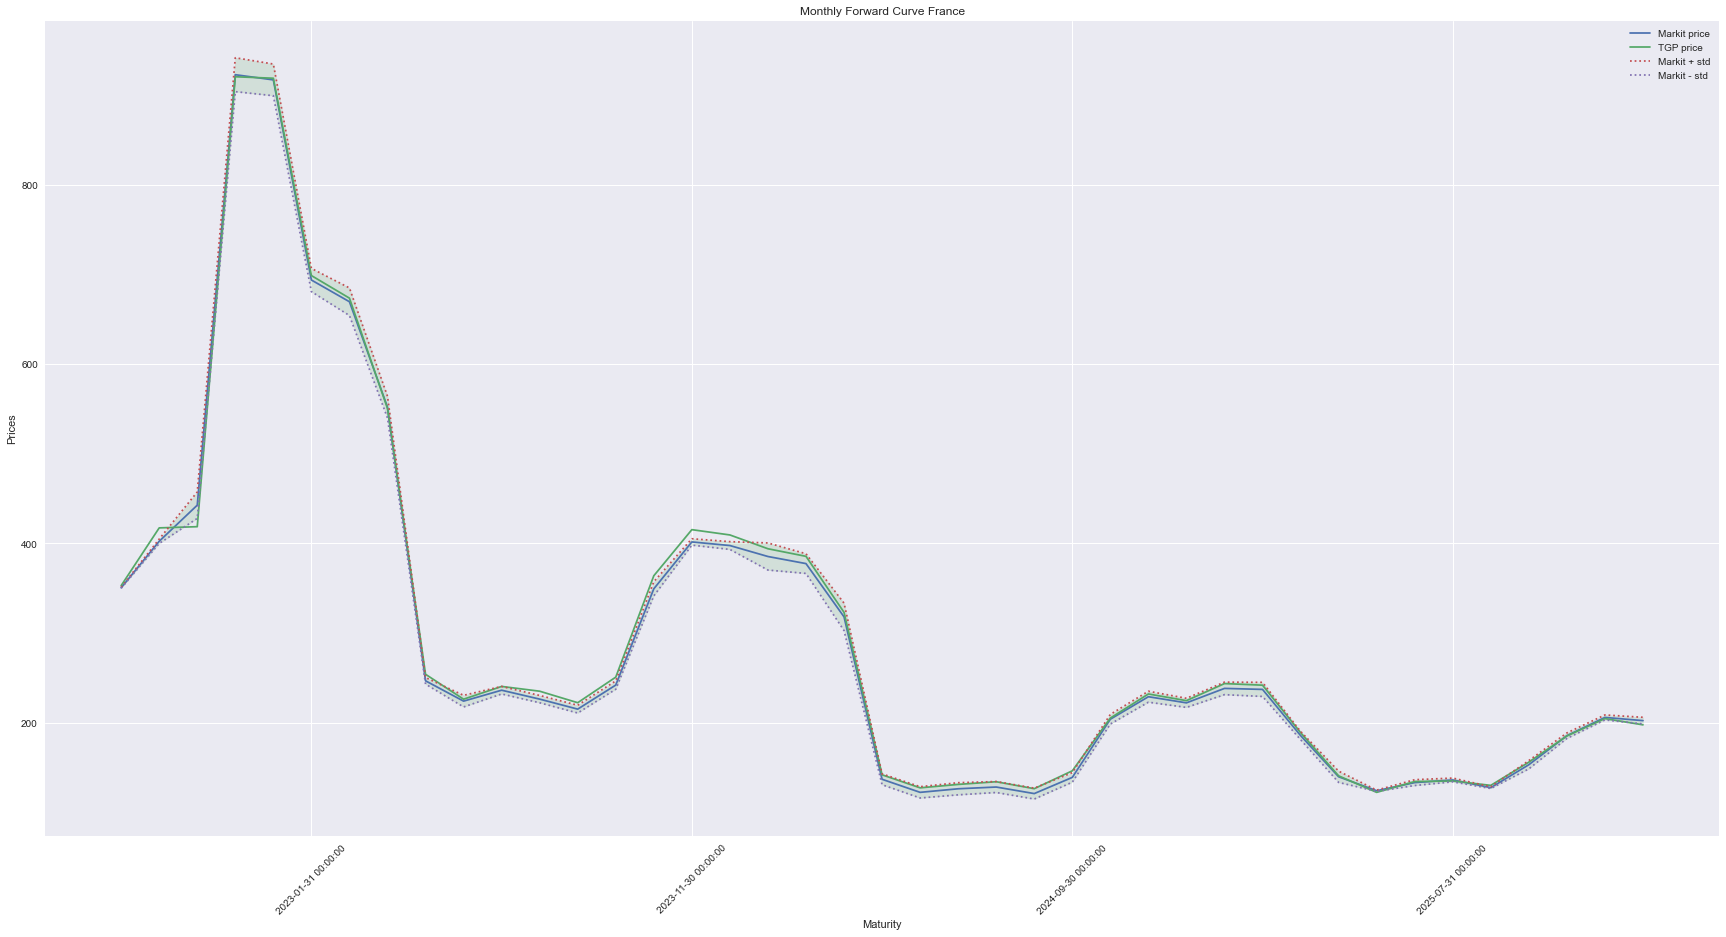

In [232]:
plt.figure(figsize=(30, 15))
plt.title("Monthly Forward Curve France")

markit_fr_pstd =  markit_fr["ns1:ConsensusPrice"] + markit_fr["ns1:StandardDeviationPrice"]
markit_fr_mstd =  markit_fr["ns1:ConsensusPrice"] - markit_fr["ns1:StandardDeviationPrice"]

plt.plot(markit_fr["ns1:EndDate"], markit_fr["ns1:ConsensusPrice"], label = "Markit price")
plt.plot(markit_fr["ns1:EndDate"], markit_fr["ns1:ClientPrice"], label = "TGP price")
plt.plot(markit_fr["ns1:EndDate"], markit_fr_pstd, ':',label = "Markit + std")
plt.plot(markit_fr["ns1:EndDate"], markit_fr_mstd, ':',label = "Markit - std")
plt.fill_between(markit_fr["ns1:EndDate"], markit_fr_pstd, markit_fr_mstd , alpha = 0.1, color = 'g')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 10))
plt.xticks(rotation = 45)

plt.xlabel("Maturity")
plt.ylabel("Prices")
plt.legend()
;